In [41]:
import pandas as pd
import matplotlib.pyplot as plt

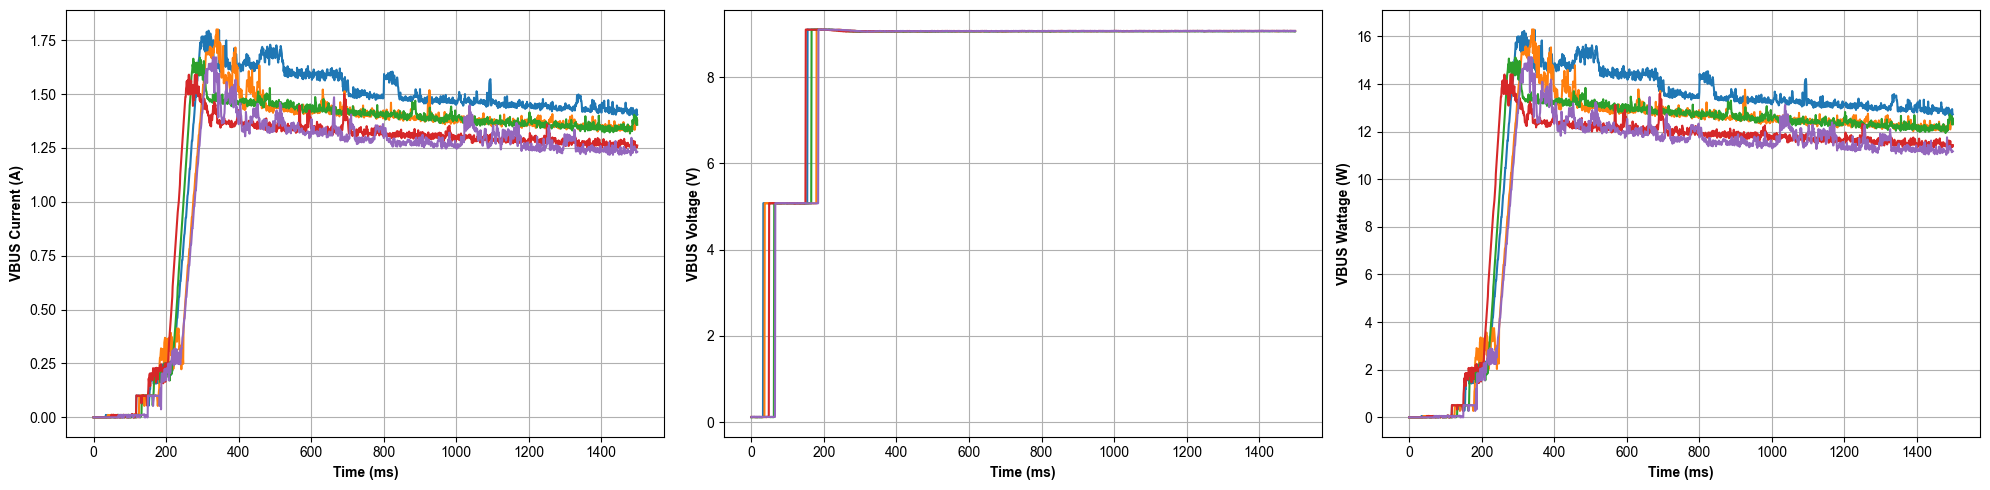

In [59]:
file_paths = [
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_1.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_2.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_3.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_4.csv',
  '../VirtualGridHub/data_collection/eval_csv/dataset_15s/Train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_6.csv'
]

columns = ['VBUS Current[A]', 'VBUS Voltage[V]', 'VBUS Wattage[W]']

def load_column_data(file_paths, columns):
  data = {}
  for col in columns:
    data[col] = []

  for path in file_paths:
    df = pd.read_csv(path)
    for col in columns:
      data[col].append(df[col])

  return data

pixel3a_15s_soc50_home_data = load_column_data(file_paths, columns)

pixel3a_15s_soc50_home_current = pixel3a_15s_soc50_home_data['VBUS Current[A]']
pixel3a_15s_soc50_home_voltage = pixel3a_15s_soc50_home_data['VBUS Voltage[V]']
pixel3a_15s_soc50_home_wattage = pixel3a_15s_soc50_home_data['VBUS Wattage[W]']

plot_data = [
    (pixel3a_15s_soc50_home_current, 'VBUS Current (A)'),
    (pixel3a_15s_soc50_home_voltage, 'VBUS Voltage (V)'),
    (pixel3a_15s_soc50_home_wattage, 'VBUS Wattage (W)')
]

plt.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i in range(len(plot_data)):
  data, ylabel = plot_data[i]
  for d in data:
    axs[i].plot(d, label='Google Pixel 3a')
  axs[i].set_xlabel('Time (ms)', fontweight='bold')
  axs[i].set_ylabel(ylabel, fontweight='bold')

  # legend = axs[i].legend()
  # for text in legend.get_texts():
  #   text.set_fontweight('bold')

  axs[i].grid(True)

plt.tight_layout()
plt.savefig('./images/GooglePixel3a/15s/vghub_15s_pixel3a_soc50_home_cvw.png')

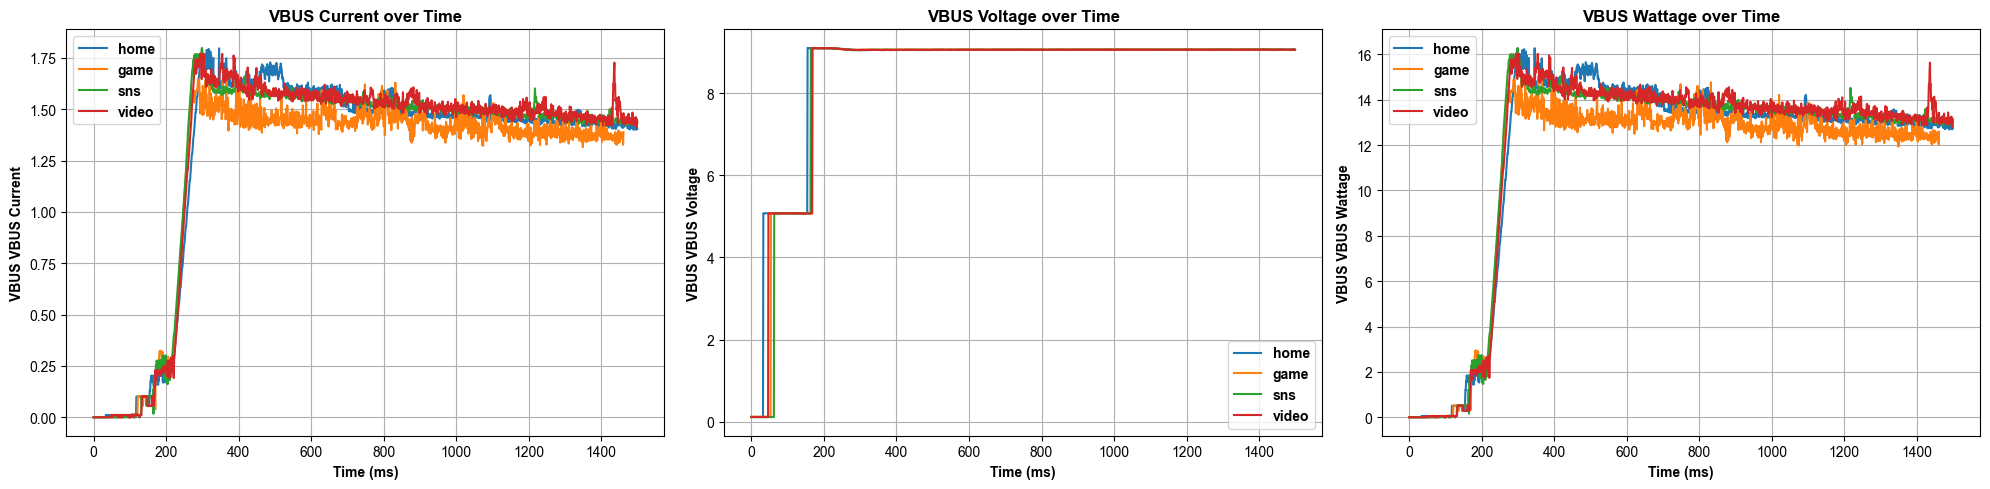

In [66]:
def load_data(file_paths):
    return [pd.read_csv(path) for path in file_paths]

def plot_data(ax, data, ylabel, title):
    for d in data:
        ax.plot(d, label=d.name)
    ax.set_xlabel('Time (ms)', fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    legend = ax.legend()
    for text in legend.get_texts():
        text.set_fontweight('bold')
    ax.grid(True)
    ax.set_title(title, fontweight='bold')

file_paths = {
    'home': '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_home_train_1.csv',
    'game': '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_game_train_3.csv',
    'sns': '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_sns_train_1.csv',
    'video': '../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc50_video_train_1.csv'
}

data_frames = load_data(file_paths.values())

columns = ['VBUS Current[A]', 'VBUS Voltage[V]', 'VBUS Wattage[W]']

plt.rcParams['font.family'] = 'Arial'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

keys_list = list(file_paths.keys())
for i, column in enumerate(columns):
    data_to_plot = [df[column].rename(keys_list[j]) for j, df in enumerate(data_frames)]
    plot_data(axs[i], data_to_plot, f'VBUS {column.split("[")[0]}', f'{column.split("[")[0]} over Time')

plt.tight_layout()
plt.savefig('./images/googlepixel3a/15s/vghub_15s_pixel3a_soc50_app_cvw.png')
plt.show()


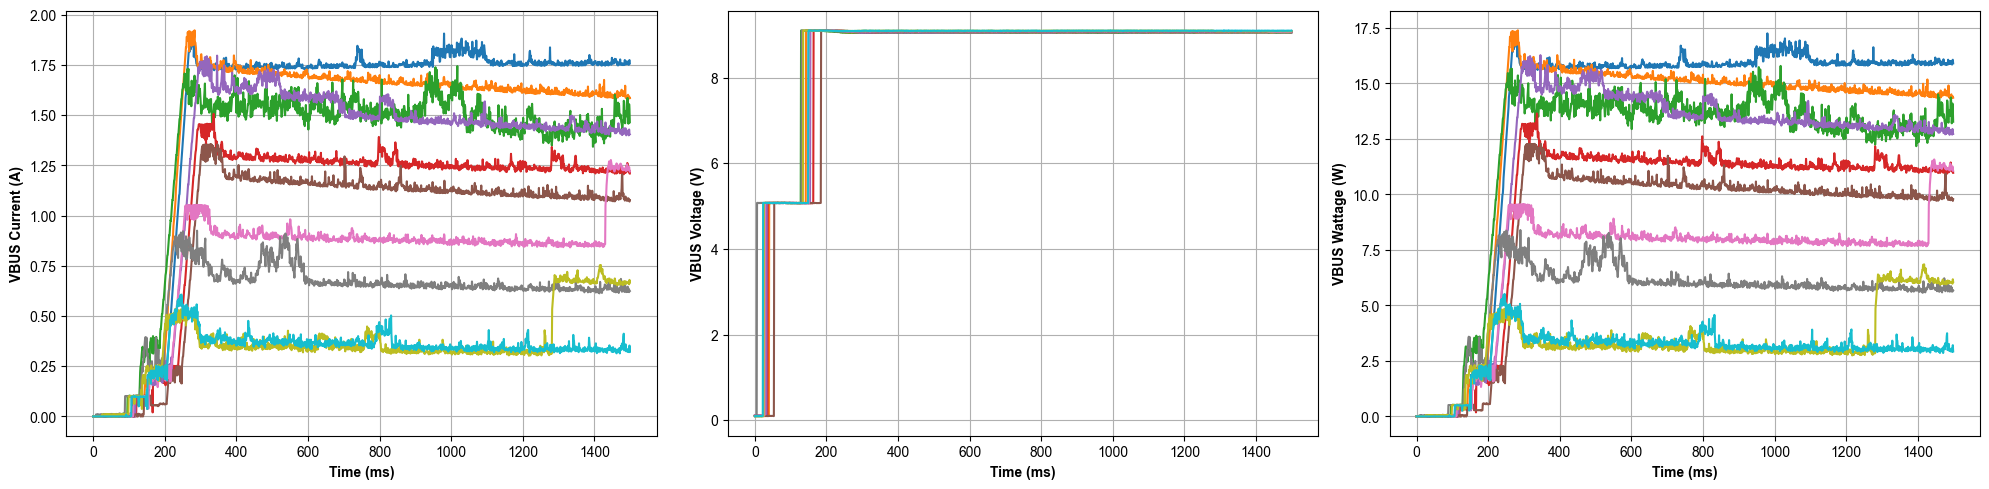

In [70]:
soc_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
column_names = ['VBUS Current[A]', 'VBUS Voltage[V]', 'VBUS Wattage[W]']

data = {}
for soc in soc_values:
    data[soc] = pd.read_csv(f'../VirtualGridHub/data_collection/eval_csv/dataset_15s/train/sink/GooglePixel3a#1/output_vghub_15s_data_3_pixel3a#1_soc{soc}_home_train_1.csv')

current_data = {soc: data[soc][column_names[0]] for soc in soc_values}
voltage_data = {soc: data[soc][column_names[1]] for soc in soc_values}
wattage_data = {soc: data[soc][column_names[2]] for soc in soc_values}

plt.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for soc in soc_values:
    axs[0].plot(current_data[soc], label=f'SOC {soc}%')
axs[0].set_xlabel('Time (ms)', fontweight='bold')
axs[0].set_ylabel('VBUS Current (A)', fontweight='bold')
axs[0].grid(True)

for soc in soc_values:
    axs[1].plot(voltage_data[soc], label=f'SOC {soc}%')
axs[1].set_xlabel('Time (ms)', fontweight='bold')
axs[1].set_ylabel('VBUS Voltage (V)', fontweight='bold')
axs[1].grid(True)

for soc in soc_values:
    axs[2].plot(wattage_data[soc], label=f'SOC {soc}%')
axs[2].set_xlabel('Time (ms)', fontweight='bold')
axs[2].set_ylabel('VBUS Wattage (W)', fontweight='bold')
axs[2].grid(True)

plt.tight_layout()
plt.savefig('./images/googlepixel3a/15s/vghub_15s_pixel3a_soc_home_cvw.png')
plt.show()
